In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # Size of input image
hidden_size = 128     # Number of units in hidden layer
num_classes = 10      # Number of classes (digits 0-9)
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 132MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 18.7MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 75.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.14MB/s]


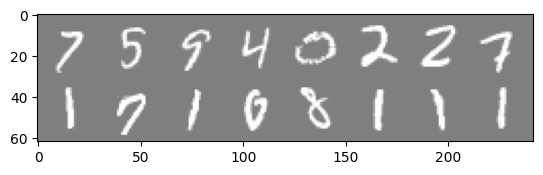

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:16]))
# Print labels
# print(' '.join('%5s' % labels[j].item() for j in range(4)))


Epoch [1/10], Loss: 0.3134, Accuracy: 93.00%
Epoch [1/10], Loss: 0.2477, Accuracy: 92.00%
Epoch [1/10], Loss: 0.4053, Accuracy: 86.00%
Epoch [1/10], Loss: 0.2871, Accuracy: 93.00%
Epoch [1/10], Loss: 0.2565, Accuracy: 94.00%
Epoch [1/10], Loss: 0.1765, Accuracy: 95.00%
Epoch [2/10], Loss: 0.1538, Accuracy: 96.00%
Epoch [2/10], Loss: 0.1775, Accuracy: 94.00%
Epoch [2/10], Loss: 0.2017, Accuracy: 94.00%
Epoch [2/10], Loss: 0.1876, Accuracy: 94.00%
Epoch [2/10], Loss: 0.1260, Accuracy: 94.00%
Epoch [2/10], Loss: 0.1789, Accuracy: 96.00%
Epoch [3/10], Loss: 0.1108, Accuracy: 96.00%
Epoch [3/10], Loss: 0.0958, Accuracy: 97.00%
Epoch [3/10], Loss: 0.1459, Accuracy: 93.00%
Epoch [3/10], Loss: 0.0906, Accuracy: 96.00%
Epoch [3/10], Loss: 0.0596, Accuracy: 99.00%
Epoch [3/10], Loss: 0.1270, Accuracy: 94.00%
Epoch [4/10], Loss: 0.0487, Accuracy: 99.00%
Epoch [4/10], Loss: 0.0762, Accuracy: 98.00%
Epoch [4/10], Loss: 0.0838, Accuracy: 97.00%
Epoch [4/10], Loss: 0.1012, Accuracy: 98.00%
Epoch [4/1

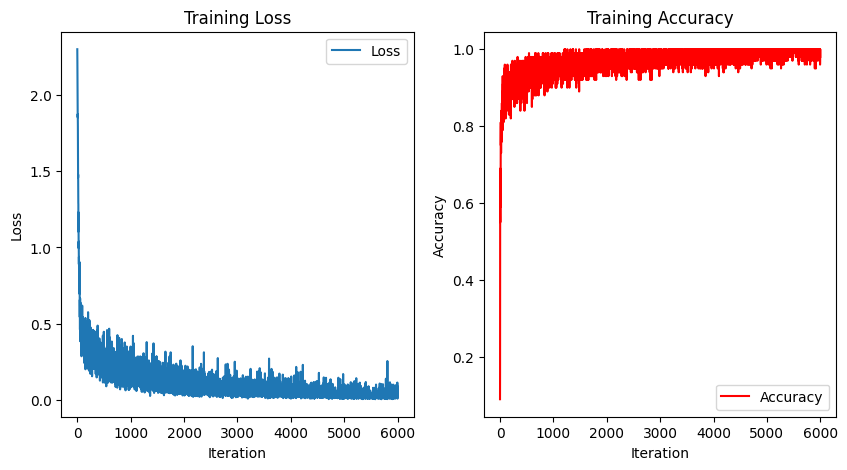

Test Accuracy of the model on the 10000 test images: 97.84 %
Total Number of Parameters: 101770


In [ ]:
# Neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                   .format(epoch+1, num_epochs, loss.item(), (correct / total) * 100))

# Plot loss and accuracy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Loss')
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_list, label='Accuracy', color='r')
plt.title('Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Print the total number of parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total Number of Parameters: {total_params}')

